In [1]:
import sys
if "../" not in sys.path:
    sys.path = ["../"] + sys.path
import matplotlib.pyplot as plt
from math import pi as π
from superqulanlibrary.waveguide import Waveguide
from superqulanlibrary.simulator import Trotter_solver_dynamics
from superqulanlibrary.architecture import Exp_2qubits_2cavities
import numpy as np
from numpy import floor, sqrt
import scipy as sp
import sympy as sym
from scipy.misc import derivative
from utils import Complex_control_non_Markov, calibrate_a_factor, Exotic_Waveguide
from numbers import Number 
from scipy.optimize import curve_fit
import scipy.optimize

In [9]:
styles = ['science']
prefix = '../stylelib/'
sufix = '.mplstyle'
import matplotlib.pyplot as plt
#matplotlib.use('agg') It is a function of matplotlib that prevents the plot form being showed
plt.rc('font', size=15)
for i in range(len(styles)):
    styles[i] = prefix + styles[i] + sufix
plt.style.use(styles)
plt.rcParams.update({'font.size': 15})
plt.rcParams['axes.linewidth'] = 1.5 #set the value globally

In [10]:
M2_linear_disp = np.load('M2_factor_linear_disp_fig2.npy')
M2_real_disp = np.load('M2_factor_real_disp_fig_2.npy')
a_factor_real_disp =  np.load('a_factor_real_disp.npy')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


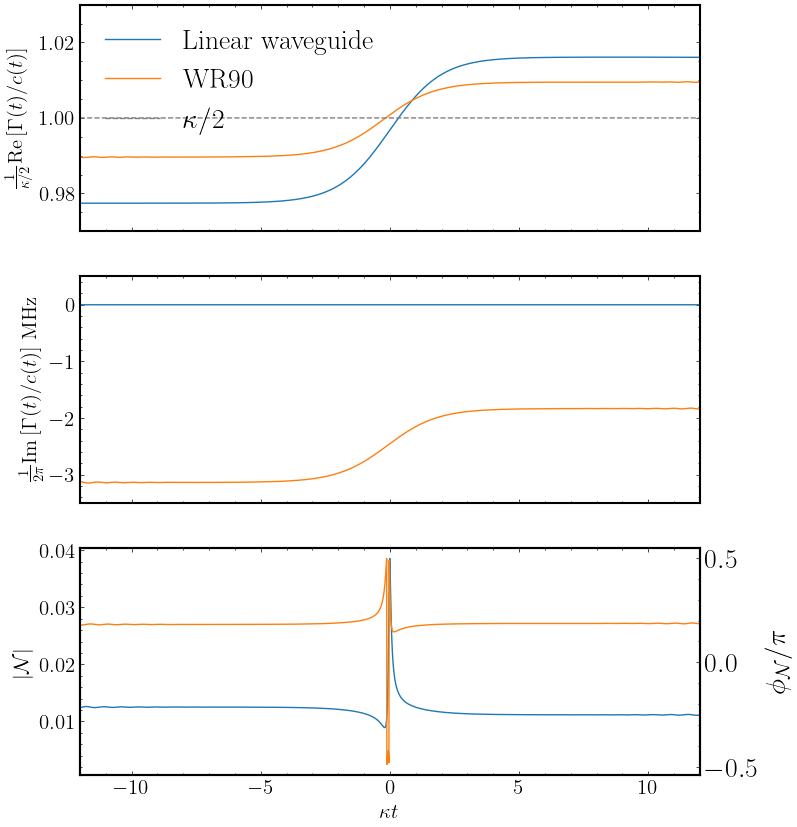

In [11]:
TT= 20
kappa = 2*π*200*1e-3
Nts = 5000

tt = np.linspace(-TT/kappa, TT/kappa, Nts)

fig, (ax1, ax2, ax) = plt.subplots(nrows=3, figsize = (8,10), sharex = True)

plt.rc('font', size=25)
plt.rcParams.update({'font.size': 20})


ax1.plot(tt*kappa, np.real(M2_linear_disp)/(kappa/2), label = 'Linear waveguide')
ax1.plot(tt*kappa, np.real(M2_real_disp)/(kappa/2), label = 'WR90')
ax1.plot(tt*kappa, np.ones(Nts), '--', label = '$\\kappa/2$', color = 'grey')

ax2.plot(tt*kappa, np.imag(M2_linear_disp)/2/π*1e3)
ax2.plot(tt*kappa, np.imag(M2_real_disp)/2/π*1e3)


ax1.set_ylabel('$\\frac{1}{\kappa/2}\\text{Re}\\left[ \Gamma(t) / c(t)   \\right]$')
ax2.set_ylabel('$\\frac{1}{2 \\pi}\\text{Im} \\left[ \Gamma(t) / c(t)  \\right]$ MHz')

ax1.set_ylim(0.97,1.03)
ax2.set_ylim(-3.5, 0.5)

ax1.set_xlim(-12,12)
ax2.set_xlim(-12,12)
ax1.legend()
ax2.legend()


ax.plot(tt*kappa, np.abs(a_factor_real_disp), label = ' a_factor realistic dispersion')

ax_aux = ax.twinx()

ax_aux.plot(tt*kappa, np.arctan(np.imag(a_factor_real_disp)/np.real(a_factor_real_disp))/π, label = '$\mathcal{N}$ ', color='tab:orange')


ax.set_xlabel('$\kappa t$')
ax.set_ylabel('$|\mathcal{N}|$')


ax_aux.set_xlabel('$\kappa t$')
ax_aux.set_ylabel('$\\phi_{\mathcal{N}} / \\pi$')


# ax.set_ylim(0.010,0.014)
# ax_aux.set_ylim(0.15, 0.22)

ax.set_xlim(-12,12)
ax_aux.set_xlim(-12,12)

# ax.legend()
# ax_aux.legend()

plt.show()



# fig.savefig('Gamma_&_Non_Markov_parameter_5meters_200MHz.svg')
# fig.savefig('Gamma_&_Non_Markov_parameter_5meters_200MHz.pdf')

In [3]:
# np.save('M2_factor_linear_disp_fig2.npy', M2_linear_disp)
# np.save('M2_factor_real_disp_fig_2.npy', M2_real_disp)
# np.save('a_factor_real_disp.npy', a_factor_real_disp)

# # a_factor_real_disp